In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import IsolationForest
import joblib

In [16]:
dfOK = pd.read_csv('allok.csv')

In [34]:
# Check if any data is NAN. If so we have to remove it
for x in pd.isnull(dfOK['temperatures.mean_hotend']):
    if x == True:
        print('Missing values')
        break

All ok no NA so we can proceed

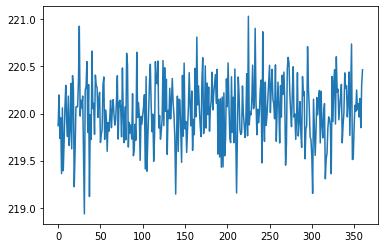

In [9]:
dfOK['temperatures.mean_hotend'].plot()

In [10]:
model = IsolationForest()
model.fit(dfOK['temperatures.mean_hotend'].values.reshape(-1,1))
joblib.dump(model, 'adsmodel.pkl')

['adsmodel.pkl']

### Now we can evaluate if the model works

In [9]:
model = joblib.load('adsmodel.pkl')

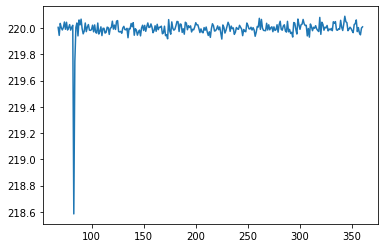

In [2]:
dfAno = pd.read_csv('anomaly.csv')
dfAno['temperatures.mean_hotend'].plot()

In [7]:
x_data = dfAno['temperatures.mean_hotend'].values
if np.isnan(x_data).any() == True:
    print(True)

True


In [4]:
# Again checking for missing data
for x in pd.isnull(dfAno['temperatures.mean_hotend']):
    if x == True:
        print('Missing values')
        break

Missing values


This time there are NA so we have to remove them

In [5]:
dfAno.dropna(inplace=True)

for x in pd.isnull(dfAno['temperatures.mean_hotend']):
    if x == True:
        print('Missing values')
        break

Now everything is clean

In [10]:
predictions = model.predict(dfAno['temperatures.mean_hotend'].values.reshape(-1,1))
probas = model.decision_function(dfAno['temperatures.mean_hotend'].values.reshape(-1,1))

In [11]:
# Check if the anomaly has been detected
# Returns -1 for outliers and 1 for inliers.
predictions

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

One anomaly has been detected so we can no compare the value to the Chronograf dash

In [44]:
dfAno['temperatures.mean_hotend'].values[predictions==-1]

array([218.58396207])

![title](anomaly.png)

### Looks like it worked

In [46]:
# Check the scores for each datapint. 
# Positive scores indicate an inlier
# Negative scores a outlier
probas

array([ 0.05291876,  0.07281485,  0.05186774,  0.04833116,  0.05589165,
        0.05276771,  0.06185595,  0.05322893,  0.05964493,  0.0573821 ,
        0.04987134,  0.04746188,  0.06042563,  0.05309809,  0.04889934,
       -0.28647988,  0.04941363,  0.05291876,  0.05787323,  0.07065202,
        0.0644079 ,  0.04769291,  0.063894  ,  0.05340992,  0.06466075,
        0.06156926,  0.05910949,  0.06086211,  0.05367199,  0.04776795,
        0.06158816,  0.0560177 ,  0.05510561,  0.04846054,  0.06579324,
        0.04840448,  0.07072382,  0.06954299,  0.05855679,  0.06334511,
        0.06458241,  0.05623802,  0.07131738,  0.04894238,  0.04944129,
        0.07192728,  0.06840316,  0.05296873,  0.052251  ,  0.06674281,
        0.04971012,  0.05194796,  0.06564586,  0.05456796,  0.04744605,
        0.05642145,  0.06476333,  0.06053743,  0.06227342,  0.06686099,
        0.06563358,  0.06671584,  0.05215061,  0.0484446 ,  0.05510561,
        0.05672007,  0.04894238,  0.04216839,  0.04817237,  0.05